In [3]:
import numpy as np 
import pandas as pd 
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import scipy.integrate as integrate
from scipy.misc import derivative
plt.style.use('fivethirtyeight')
#fivethirtyeight
# %matplotlib qt
%matplotlib inline

In [50]:
def laplace(name):
     time = np.linspace(-1, I, I*500)
     h = lambda t: 1/(b-a)*(np.exp(-a*t)-np.exp(-b*t)) 
     h_der = lambda t: 1/(b-a)*(-a*np.exp(-a*t)+b*np.exp(-b*t))

     force = np.zeros(time.size)
     for i in range(0, time.size):
          force[i] = f(time[i])

     y1 = np.zeros(time.size)
     for i in range(0, time.size):
          t = time[i]
          product = lambda tau: f(tau)*h(t-tau)
          y1[i] = integrate.quad(product, 0, t, points=[-I,I])[0]
          
     y2 = A*y0*h_der(time)+(A*y01 + B*y0)*h(time)
     y = (y1 + y2).real
     #5*h(time-2)*np.heaviside(time-2, 1)

     first = np.gradient(y, time)
     second = np.gradient(first, time)

     print(np.interp(0, time, y), np.interp(0, time, first))

     fig = plt.figure(figsize=(8, 6))
     ax1 = fig.add_subplot(221)
     ax2 = fig.add_subplot(222)
     ax1.plot(time, y, label='y', color='crimson')
     #ax2.plot(time[10:-10], (A*second + B*first + C*y)[10:-10], color='crimson', label='f numerical')
     ax2.plot(time, force, color='black', label='f')
     ax1.legend(loc="upper right"); ax2.legend(loc="upper right");
     plt.savefig('images/p1_'+name, bbox_inches='tight')


4.999996223425753 3.0000311518436518


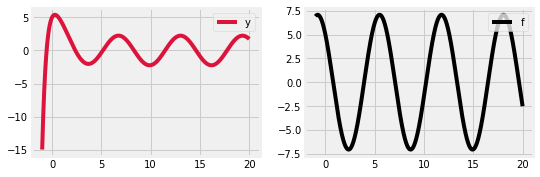

In [45]:
I=20
eq = '$y\'\' + 3y\'+ 2y = -5sin(t)+5cos(t)$'
A, B, C = 1, 3, 2 
a, b = 1, 2
y0, y01 = 5, 3
f = lambda t: -5*np.sin(t)+5*np.cos(t)

laplace('1')

1.9999973318509376 4.000006300203065


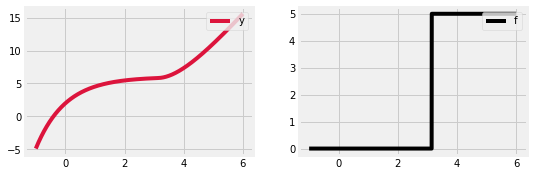

In [46]:
I=6
eq = '$y\'\' -y\' = 5h(t-\pi)$'
A, B, C = 1, 1, 0 
a, b = 1, 0
y0, y01 = 2, 4
f = lambda t: 0 if t <= np.pi else 5

laplace('2')

-7.2057591309245e-07 0.9999983186456913


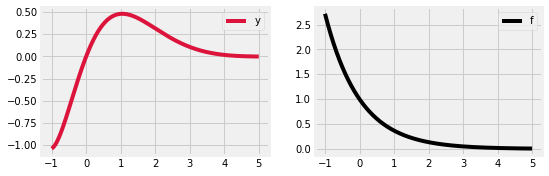

In [47]:
I=5
eq = '$y\'\' + 2y\'+ 2y = e^{-t}+5\delta(t-2)$'
A, B, C = 1, 2, 2 
a, b = 1+1j, 1-1j
y0, y01 = 0, 1
f = lambda t: np.exp(-t)

laplace('3')

3.0000262708137555 -7.973968886073919


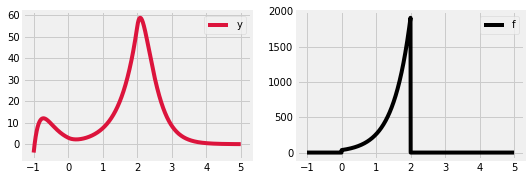

In [48]:
eq = '$y\'\' + 8y\'+ 15y = 35e^{2t} \: si \: |t|<2, \quad 0 \: c.c$'
A, B, C = 1, 8, 15 
a, b = 5, 3
y0, y01 = 3, -8
time = np.linspace(-0.3, I, I*100)
f = lambda t: 35*np.exp(2*t) if t < 2 and t > 0 else 0

laplace('4')

In [55]:
def green(name):
    time = np.linspace(a+0.01, b, 1000)
    w = lambda x: x_1(x)*v_2(x) - v_1(x)*x_2(x)
    A = lambda x: x_2(x)/w(x)
    B = lambda x: x_1(x)/w(x) 

    I_1 = lambda x: integrate.quad(lambda t: B(t)*f(t), a+0.01, x, points=[a,x])[0]
    I_2 = lambda x: integrate.quad(lambda t: A(t)*f(t), x, b-0.01, points=[x,b])[0]

    y = np.zeros(time.size)
    for i in range(0, y.size):
        x = time[i]
        y[i] = x_2(x)*I_1(x) + x_1(x)*I_2(x)

    first = np.gradient(y, time)
    second = np.gradient(first, time)

    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax1.plot(time, y, label='y', color='crimson')
    #ax2.plot(time[10:-10], (second + p(time)*first + q(time)*y)[10:-10], color='crimson', label='f numerical')
    ax2.plot(time, f(time), color='black', label='f')
    ax1.legend(loc="upper right"); ax2.legend(loc="upper right");
    plt.savefig('images/p3_'+name, bbox_inches='tight')

In [34]:
sech = lambda x: 1/np.cosh(x)
csc = lambda x: 1/np.sin(x)
cot = lambda x: np.cos(x)/np.sin(x)

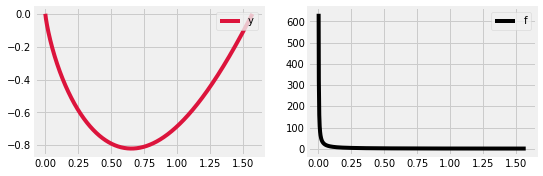

In [35]:
a, b = 0, 1/2*np.pi

p = lambda x: 0
q = lambda x: 1
f = lambda x: 1/np.sin(x)

x_1 = lambda x: np.sin(x) 
x_2 = lambda x: np.cos(x)

v_1 = lambda x: np.cos(x)
v_2 = lambda x: -np.sin(x)

green('1')

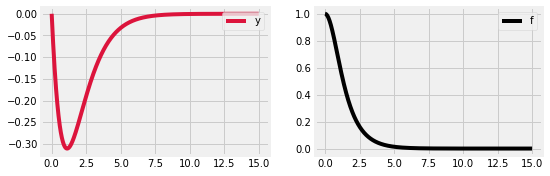

In [36]:
a, b = 0, 15

p = lambda x: 0
q = lambda x: -1
f = sech

x_1 = lambda x: np.sinh(x) 
x_2 = lambda x: np.cosh(x-b)-1

v_1 = lambda x: np.cosh(x)
v_2 = lambda x: np.sinh(x-b)

green('1')

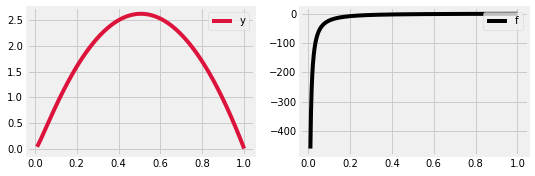

In [56]:
a, b = 0, 1

p = lambda x: -2/x
q = lambda x: 2/x**2
f = lambda x: np.log(x)/x

x_1 = lambda x: x**2
x_2 = lambda x: x**2-x

v_1 = lambda x: 2*x
v_2 = lambda x: 2*x-1

green('2')

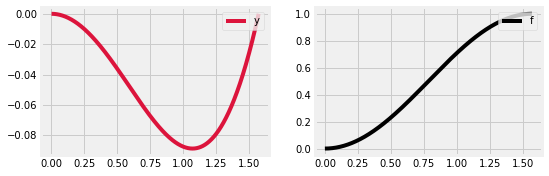

In [38]:
a, b = 0, np.pi/2

p = lambda x: 0
q = lambda x: -2*csc(x)**2
f = lambda x: np.sin(x)**2

x_1 = lambda x: 1-x*cot(x)
x_2 = lambda x: cot(x)

v_1 = lambda x: -cot(x)+x*csc(x)**2
v_2 = lambda x: -csc(x)**2

green('3')

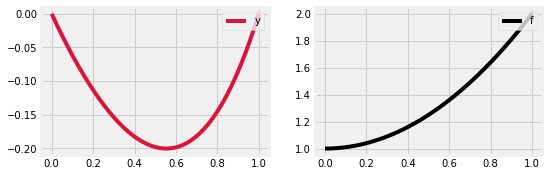

In [39]:
a, b = 0, 1

p = lambda x: -2*x/(x**2+1)
q = lambda x: 2/(x**2+1)
f = lambda x: x**2+1; 

x_1 = lambda x: x
x_2 = lambda x: 1-x**2

v_1 = lambda x: 1
v_2 = lambda x: -2*x

green('4')

In [21]:
def deltas(h, name):
    time = np.linspace(-I, I, I*1000)
    colors = pl.cm.Blues(np.linspace(.4,1,epsilons.size))
    for i in range(1,epsilons.size):
        eps=epsilons[-i]
        f = lambda t: h(t, eps)
        plt.plot(time, f(time), color=colors[i])
        
    plt.title(eq)
    plt.legend(loc="upper right")
    plt.savefig('images/p2_'+name, bbox_inches='tight')

No handles with labels found to put in legend.


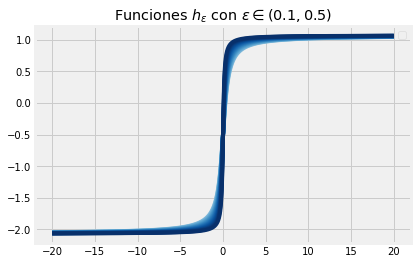

In [22]:
I = 20
e_1, e_2 = 0.1, 0.5;
epsilons = np.linspace(e_1, e_2, 20);
h = lambda t, eps: np.arctan(t/eps)-1/2;
eq = 'Funciones $h_\epsilon$ con $\epsilon \in ('+str(e_1)+','+str(e_2)+')$'
deltas(h, 'h')

No handles with labels found to put in legend.


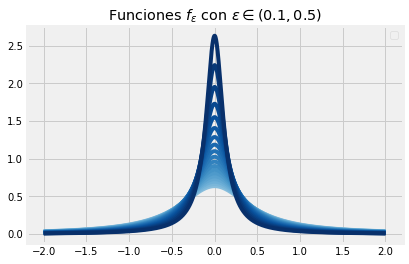

In [23]:
I = 2
f = lambda t, eps: 1/np.pi*eps/(t**2+eps**2);
eq = 'Funciones $f_\epsilon$ con $\epsilon \in ('+str(e_1)+','+str(e_2)+')$'
deltas(f, 'f')
        # f = lambda x: 1/np.pi*eps/(x**2+eps**2)
        # f_dot = lambda x: 1/np.pi*eps/(2*x+eps**2)
        # second = lambda x: f + x*f_dot
        # f_ddot = lambda x: 1/np.pi*eps/(2+eps**2)
        # f_ddot = np.vectorize(f_ddot)
        #plt.plot(time, f(time), color=colors[i])

No handles with labels found to put in legend.


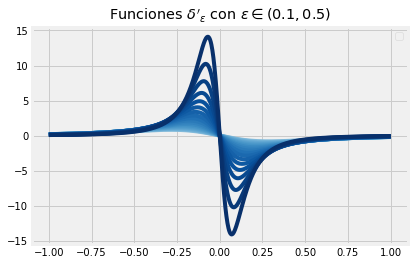

In [24]:
I = 1
f_dot = lambda t, eps: -1/np.pi*2*eps*t/(t**2+eps**2)**2
eq = 'Funciones $\delta\'_\epsilon$ con $\epsilon \in ('+str(e_1)+','+str(e_2)+')$'
deltas(f_dot, 'f_dot')

No handles with labels found to put in legend.


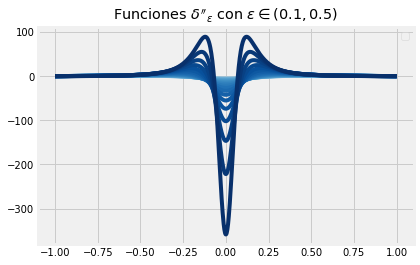

In [25]:
I = 1
f_ddot = lambda t, eps: 1/np.pi*2*eps*(3*t**2-eps**2)/(t**2+eps**2)**3
f_ddot = np.vectorize(f_ddot)
eq = 'Funciones $\delta\'\'_\epsilon$ con $\epsilon \in ('+str(e_1)+','+str(e_2)+')$'
deltas(f_ddot, 'f_ddot')